# COVID 19 Analysis
an LSTM approch

Kiarash Kiani

kiani@kiarash.info

In [1]:
import pandas as pd
import numpy as np

# 1.loading dataset

In [2]:
df = pd.read_csv('data/Labeled-Data-v1.csv')
docs = df[['Content', 'مثبت', 'منفی']]

## 1.1 Removing neutral data

In [3]:
docs = docs[(docs['مثبت'] != 0) | (docs['منفی'] != 0)]

print(f"{len(docs[docs['منفی']==1])} negetive texts and {len(docs[docs['مثبت']==1])} positive text.")
print(f"{len(docs)} texts in total.")

1511 negetive texts and 793 positive text.
2300 texts in total.


In [4]:
X = df['Content'].values
y = df['مثبت'].values

## 1.2 Removing Emojis

In [5]:
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

X = [remove_emoji(doc) for doc in X]

## 1.3 Removing URLs

In [6]:
import re

def remove_url(text):
    return re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

X = [remove_url(doc) for doc in X]

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)

vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(X)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

# 2. Build the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           1449760   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 200, 50)           16600     
_________________________________________________________________
lstm_9 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 1,473,986
Trainable params: 1,473,986
Non-trainable params: 0
____________________________________________

In [22]:
history = model.fit(padded_sequence, y, validation_split=0.2, epochs=5, batch_size=32)

Train on 5071 samples, validate on 1268 samples
Epoch 1/5
5071/5071 [==============================] - 52s 10ms/sample - loss: 0.4201 - acc: 0.8685 - val_loss: 0.3634 - val_acc: 0.8817
Epoch 2/5
5071/5071 [==============================] - 51s 10ms/sample - loss: 0.3847 - acc: 0.8732 - val_loss: 0.3597 - val_acc: 0.8817
Epoch 3/5
5071/5071 [==============================] - 51s 10ms/sample - loss: 0.3219 - acc: 0.8846 - val_loss: 0.3458 - val_acc: 0.8691
Epoch 4/5
5071/5071 [==============================] - 51s 10ms/sample - loss: 0.2269 - acc: 0.9209 - val_loss: 0.3597 - val_acc: 0.8730
Epoch 5/5
5071/5071 [==============================] - 51s 10ms/sample - loss: 0.1681 - acc: 0.9391 - val_loss: 0.4069 - val_acc: 0.8620


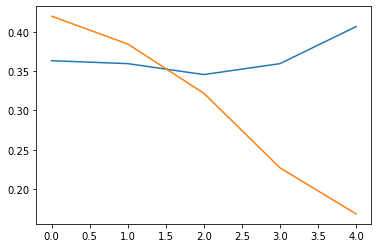

In [23]:
import matplotlib.pyplot as pl

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

In [ ]:
for index in np.where(y!=0)[0]:
    test_word = X[index]
    tw = tokenizer.texts_to_sequences([test_word])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print(prediction)
# sentiment_label[1][prediction]